In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt     ## Importing important library
import scipy.stats as sc
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

In [3]:
data=pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [4]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].abs()


#  LEVEL 0 ANALYSIS  --UNDERSTANDING ABOUT DATA

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82133 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_CURR           82133 non-null  int64  
 1   TARGET               82133 non-null  int64  
 2   NAME_CONTRACT_TYPE   82133 non-null  object 
 3   GENDER               82133 non-null  object 
 4   Car                  82133 non-null  object 
 5   House                82133 non-null  object 
 6   CNT_CHILDREN         82133 non-null  int64  
 7   AMT_INCOME_TOTAL     82133 non-null  float64
 8   AMT_CREDIT           82133 non-null  float64
 9   AMT_GOODS_PRICE      82059 non-null  float64
 10  NAME_TYPE_SUITE      81794 non-null  object 
 11  NAME_INCOME_TYPE     82133 non-null  object 
 12  NAME_EDUCATION_TYPE  82133 non-null  object 
 13  NAME_FAMILY_STATUS   82133 non-null  object 
 14  DAYS_EMPLOYED        82133 non-null  float64
 15  MOBILE               82133 non-null 

In [65]:
data.columns  # to show the column names

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [66]:
data.isnull().sum()  # to show the count of missing values for each column

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           74
NAME_TYPE_SUITE          339
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        13359
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [5]:
data= data.dropna(axis = 0, how ='any') 

In [68]:
data.shape

(68493, 24)

In [69]:
data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED          float64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

In [6]:
cat_data=data.select_dtypes(include='object')  # calling a function to get categorical data
cat_data.shape

(68495, 10)

In [7]:
num_data=data.select_dtypes(exclude='object')  # calling a function to get categorical data
num_data.shape

(68495, 14)

In [ ]:
def catgorical_data(col):
    print(f"unique values in {col} are:{data[col].unique()}")  # using unique we can get unique column
    print(f"Mode of {col} is {data[col].mode()[0]}")           # using mode we can get the mode of columns
    print(f"Number of misssing values in {col} is {data[col].isnull().sum()}")  # it will return the values are which are missing

In [ ]:
def numerical_data(col):
    print(f"Mean of {col} is {data[col].mean()}")  # mean will let us know the mean of specfic column
    print(f"Median of {col} is {data[col].median()}")   # median will let us know the median of specfic column
    print(f"STD of {col} is {data[col].std()}")          # std will let us know the standard deviation of specfic column
    print(f"Skewness of {col} is {data[col].skew()}")     # skew will let us know the skewness of specfic column
    print(f"Number of misssing values in {col} is {data[col].isnull().sum()}")    # isnull will let us know the values of missing values of specfic column

# LEVEL 1 ANALYSIS –UNIVARATE ANALYSIS

Text(0.5, 1.0, 'Count of customers who did not pay the Loan EMI')

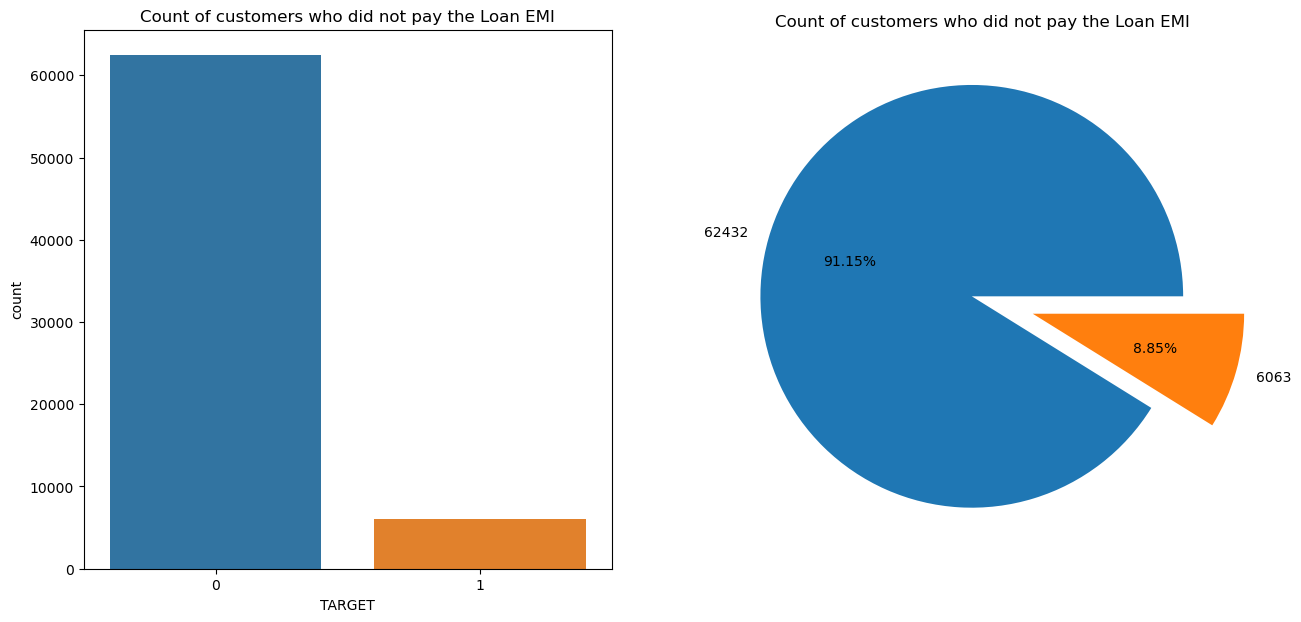

In [8]:
plt.figure(figsize=(15, 7))  
plt.subplot(121)
sb.countplot(x='TARGET',data=data)  # giving function for bargraph
plt.title('Count of customers who did not pay the Loan EMI')

per = data["TARGET"].value_counts() 
l = data["TARGET"].unique()
plt.subplot(122)
plt.pie(per,labels = per, autopct= "%0.2f%%",explode=(0.05,0.25))  # giving functions for pie chart
plt.title('Count of customers who did not pay the Loan EMI')

## Here we can see 8.85% clients are defaulters who have issues in paying loans

Text(0.5, 1.0, 'GenderWise count of Customers who applied for loan')

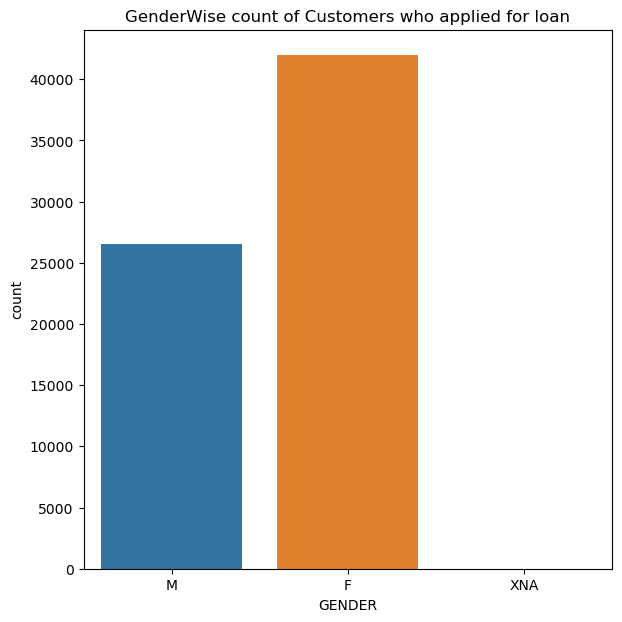

In [73]:
plt.figure(figsize=(15, 7))  
plt.subplot(121)
sb.countplot(x='GENDER',data=data)  # giving function for bargraph
plt.title('GenderWise count of Customers who applied for loan')


## Here we can see there are more number of female who have applied for loan

Text(0.5, 1.0, 'Count of clients who have the car or not')

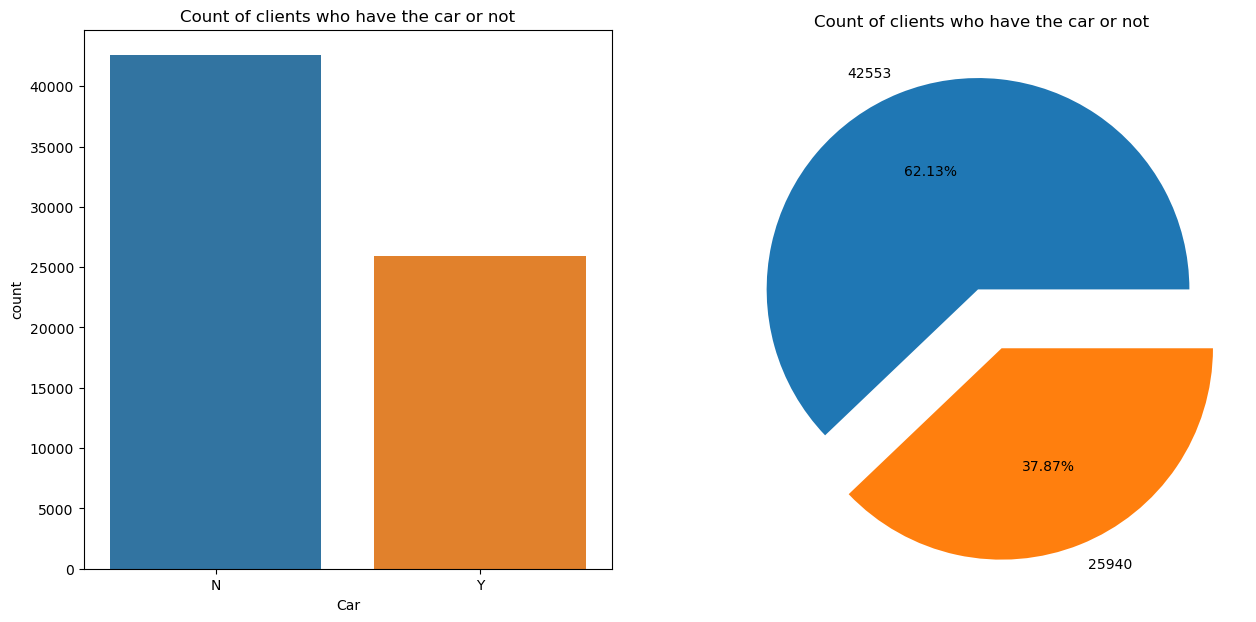

In [74]:
plt.figure(figsize=(15, 7))  
plt.subplot(121)
sb.countplot(x='Car',data=data)  # giving function for bargraph
plt.title('Count of clients who have the car or not')

per = data["Car"].value_counts() 
l = data["Car"].unique()
plt.subplot(122)
plt.pie(per,labels = per, autopct= "%0.2f%%",explode=(0.05,0.25))  # giving functions for pie chart
plt.title('Count of clients who have the car or not')

## here we can see that 62.13% clients are there who does not own the car.

Text(0.5, 1.0, 'Count of children')

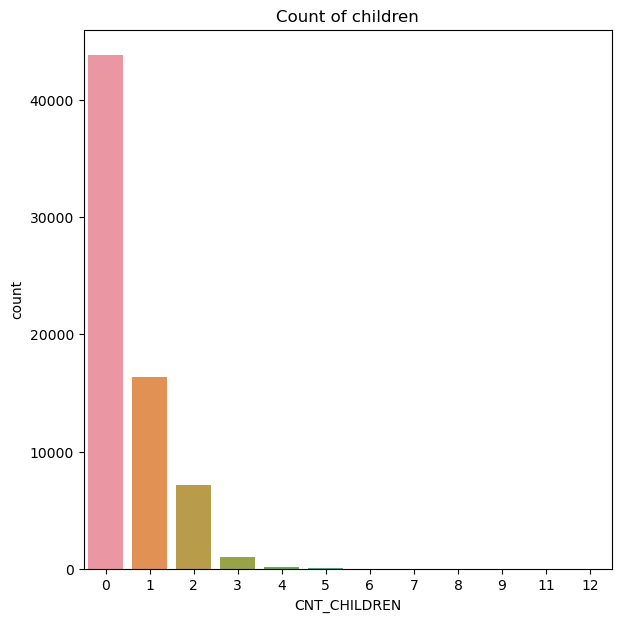

In [75]:
plt.figure(figsize=(15, 7))  
plt.subplot(121)
sb.countplot(x='CNT_CHILDREN',data=data)  # giving function for bargraph
plt.title('Count of children')


## Here we can see mostly clients does not have children who have applied for loan.

Text(0.5, 1.0, 'Count of Familt members')

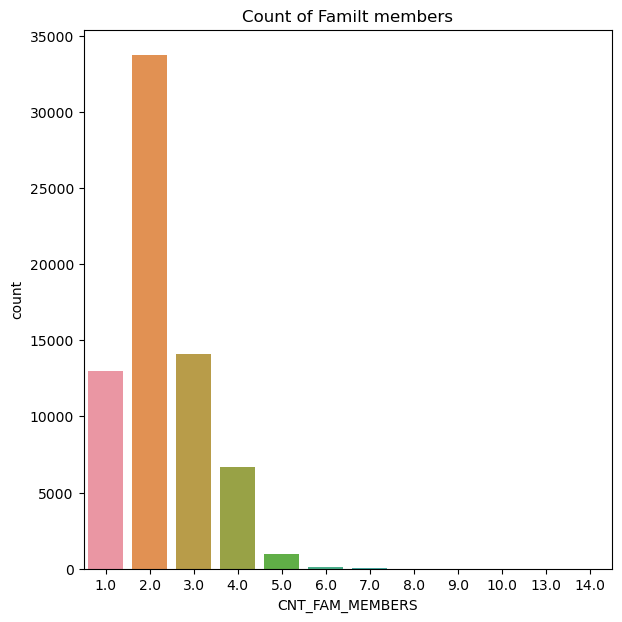

In [76]:
plt.figure(figsize=(15, 7))  
plt.subplot(121)
sb.countplot(x='CNT_FAM_MEMBERS',data=data)  # giving function for bargraph
plt.title('Count of Familt members')


## Here we can see that the clients who have applied for loan mostly has 2 members in a family.

Text(0.5, 1.0, 'MOBILE NO Provied Count')

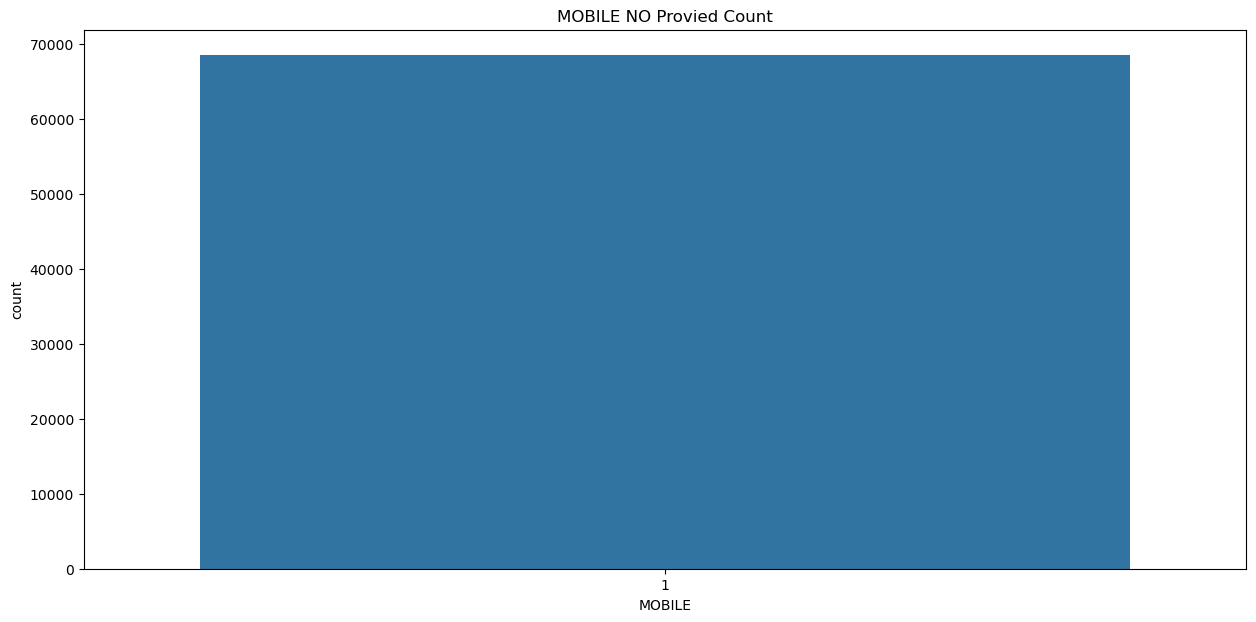

In [77]:
plt.figure(figsize=(15, 7))  
sb.countplot(x='MOBILE',data=data)  # giving function for bargraph
plt.title('MOBILE NO Provied Count')

## Here we can see all the clients have provided the mobile numbers.

Text(0.5, 1.0, 'Count of clients with Home Phone')

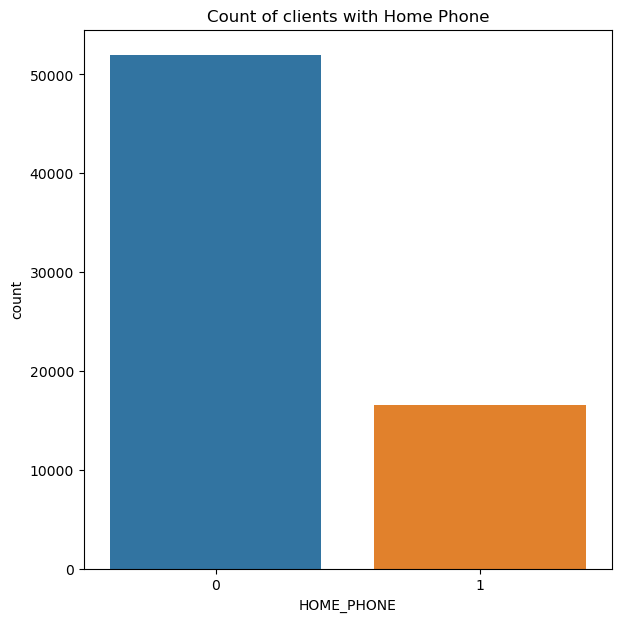

In [78]:
plt.figure(figsize=(15, 7))  
plt.subplot(121)
sb.countplot(x='HOME_PHONE',data=data)  # giving function for bargraph
plt.title('Count of clients with Home Phone')

## Here we can see that more number of client does not provided the home number

Text(0.5, 1.0, 'Count of clients with Work Phone')

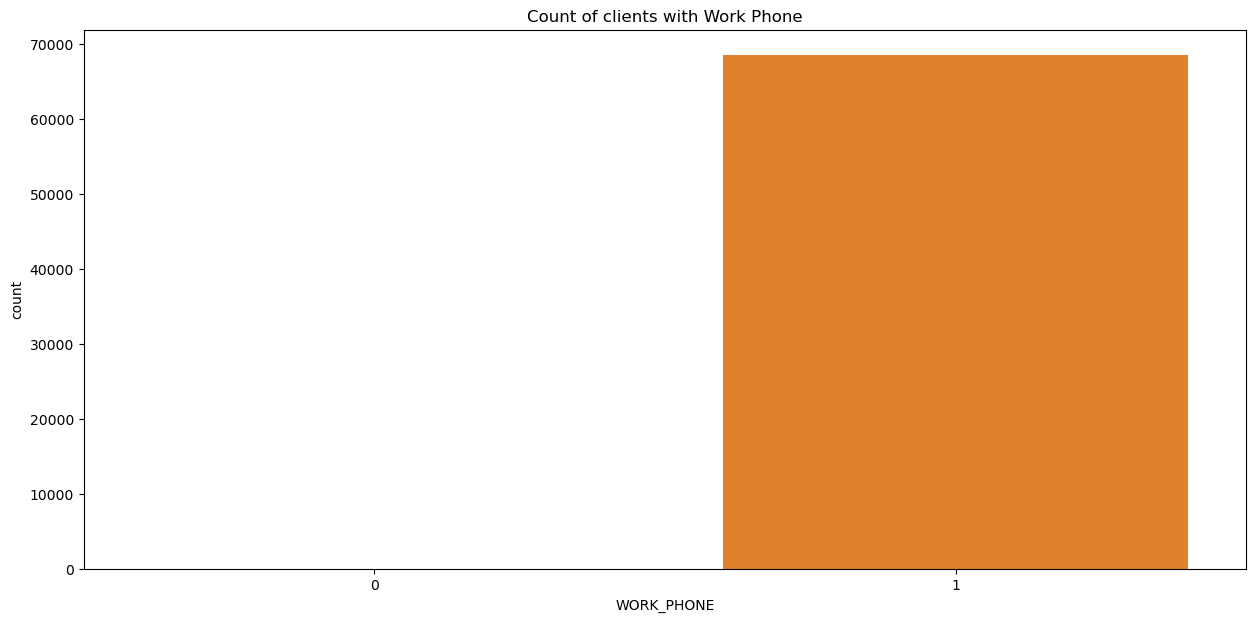

In [79]:
plt.figure(figsize=(15, 7))  
sb.countplot(x='WORK_PHONE',data=data)  # giving function for bargraph
plt.title('Count of clients with Work Phone')

## The graph says that all the clients have provided the work phone number

Text(0.5, 1.0, 'Count of clients whom mobile number is active')

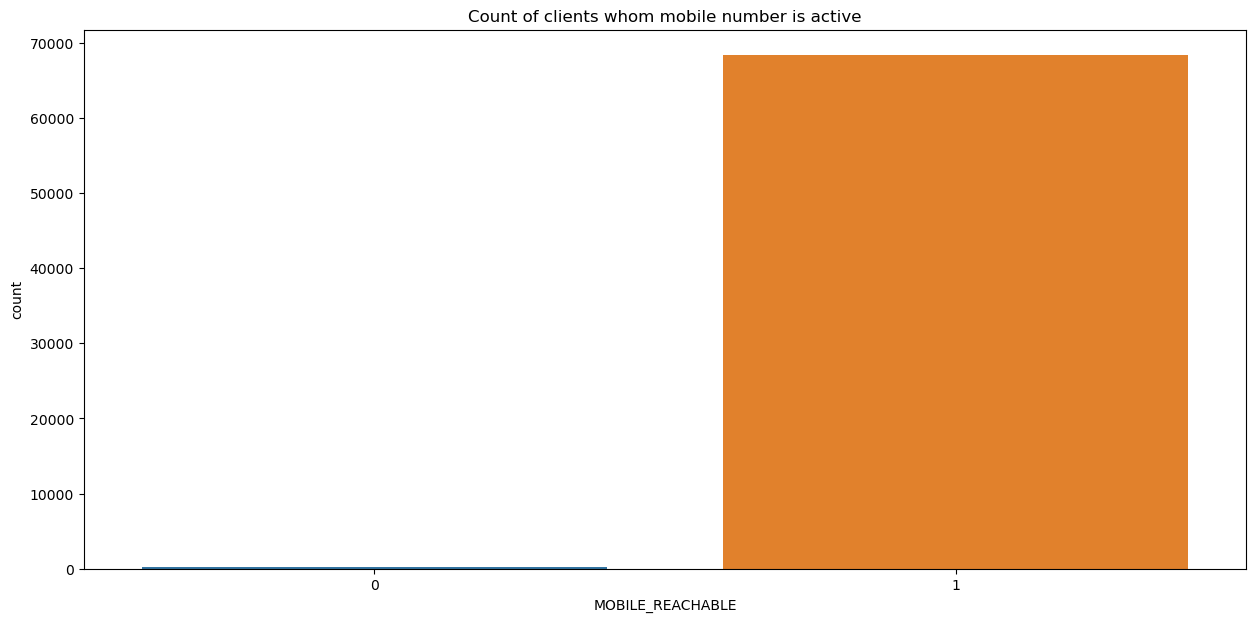

In [80]:
plt.figure(figsize=(15, 7))  
sb.countplot(x='MOBILE_REACHABLE',data=data)  # giving function for bargraph
plt.title('Count of clients whom mobile number is active')

## Here we can see that all the clients have the active mobile number

Text(0.5, 1.0, 'Count of clients with Email provided')

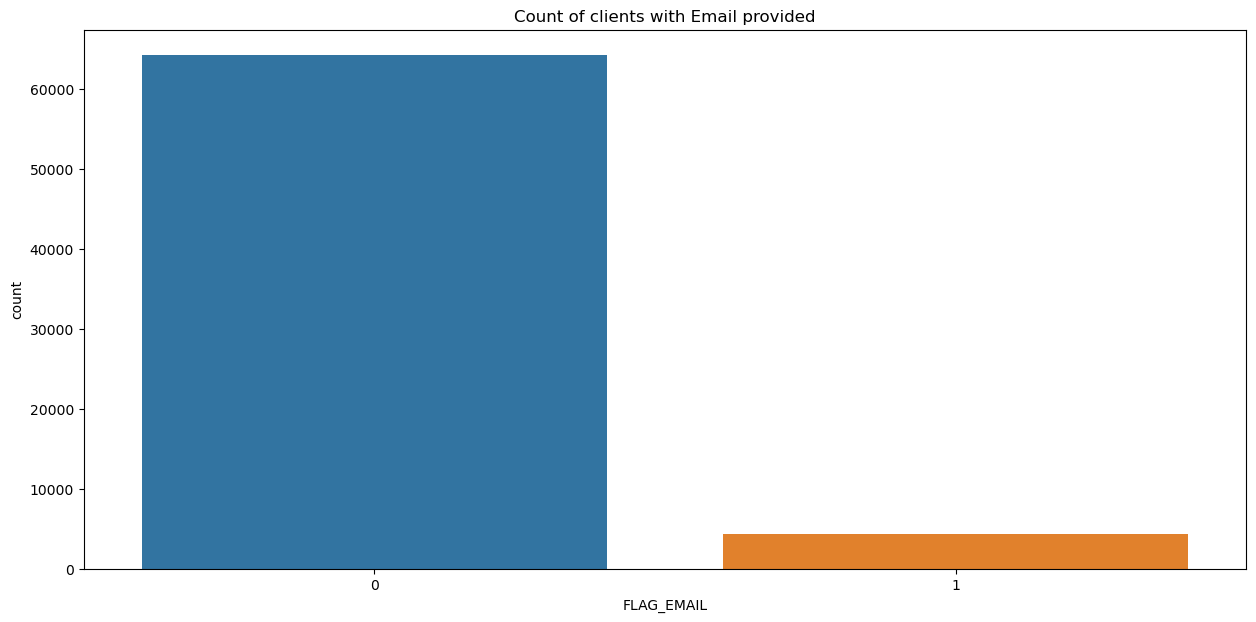

In [81]:

plt.figure(figsize=(15, 7))  
sb.countplot(x='FLAG_EMAIL',data=data)  # giving function for bargraph
plt.title('Count of clients with Email provided')

## Here we can see that the Mostly clients does not provided the mail id.

# LEVEL 2 ANALYSIS – BIVARATE ANALYSIS

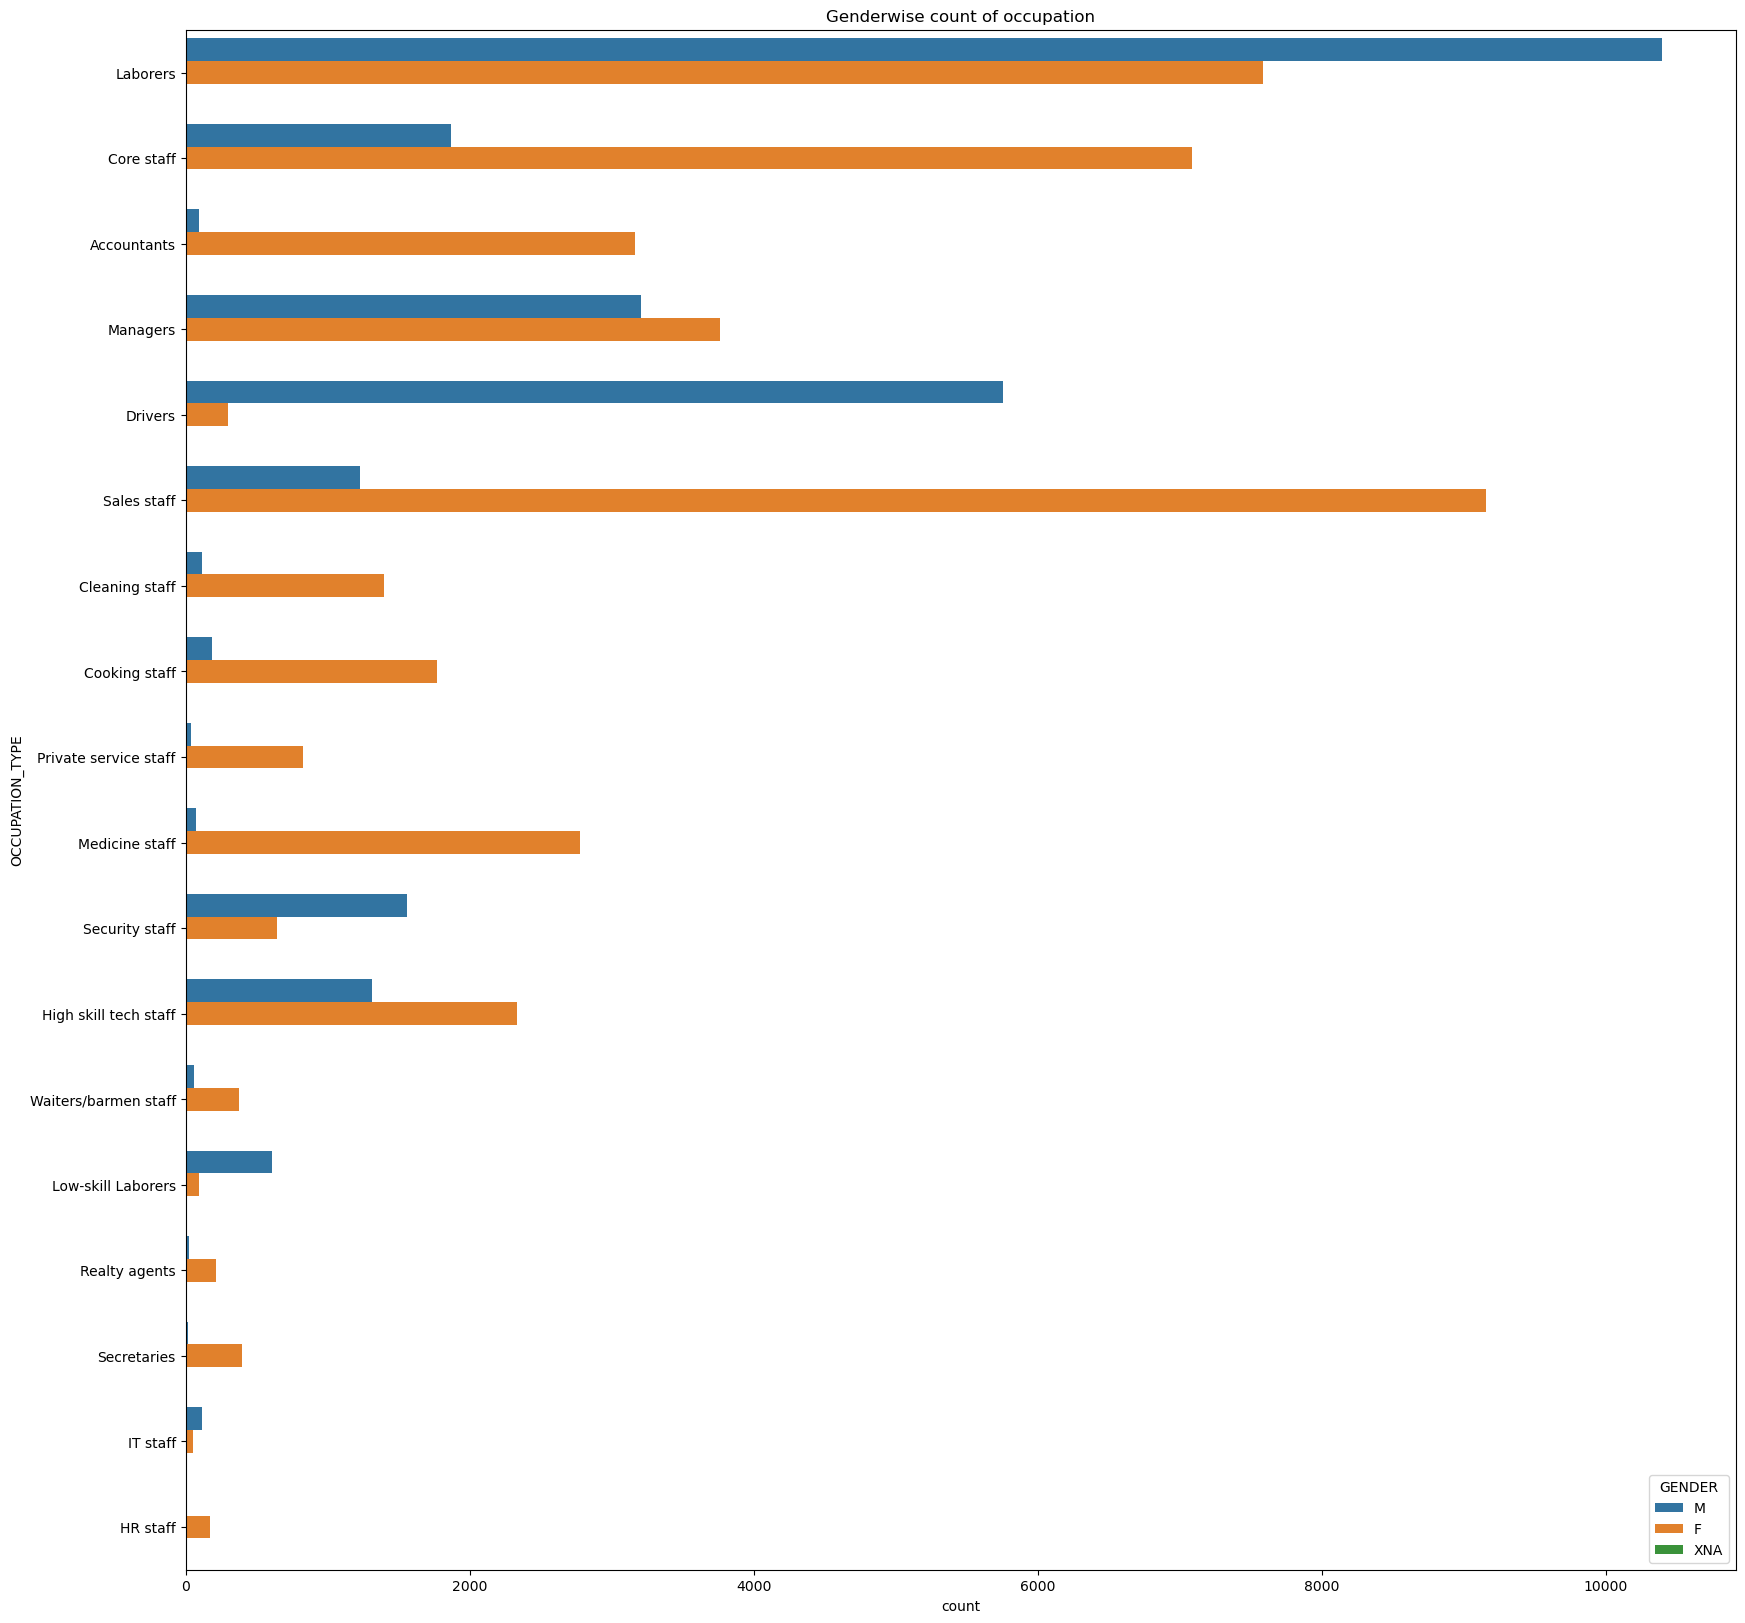

In [52]:
fig, ax = plt.subplots(figsize = (20, 20))
sb.countplot(y = "OCCUPATION_TYPE", hue = "GENDER", data = data)
plt.title('Genderwise count of occupation')
plt.show()


## Here we can see The number of male is higher from Laborer and driver category and number of female belong to laborer,corestaff
## and sales staff who have applied for loan

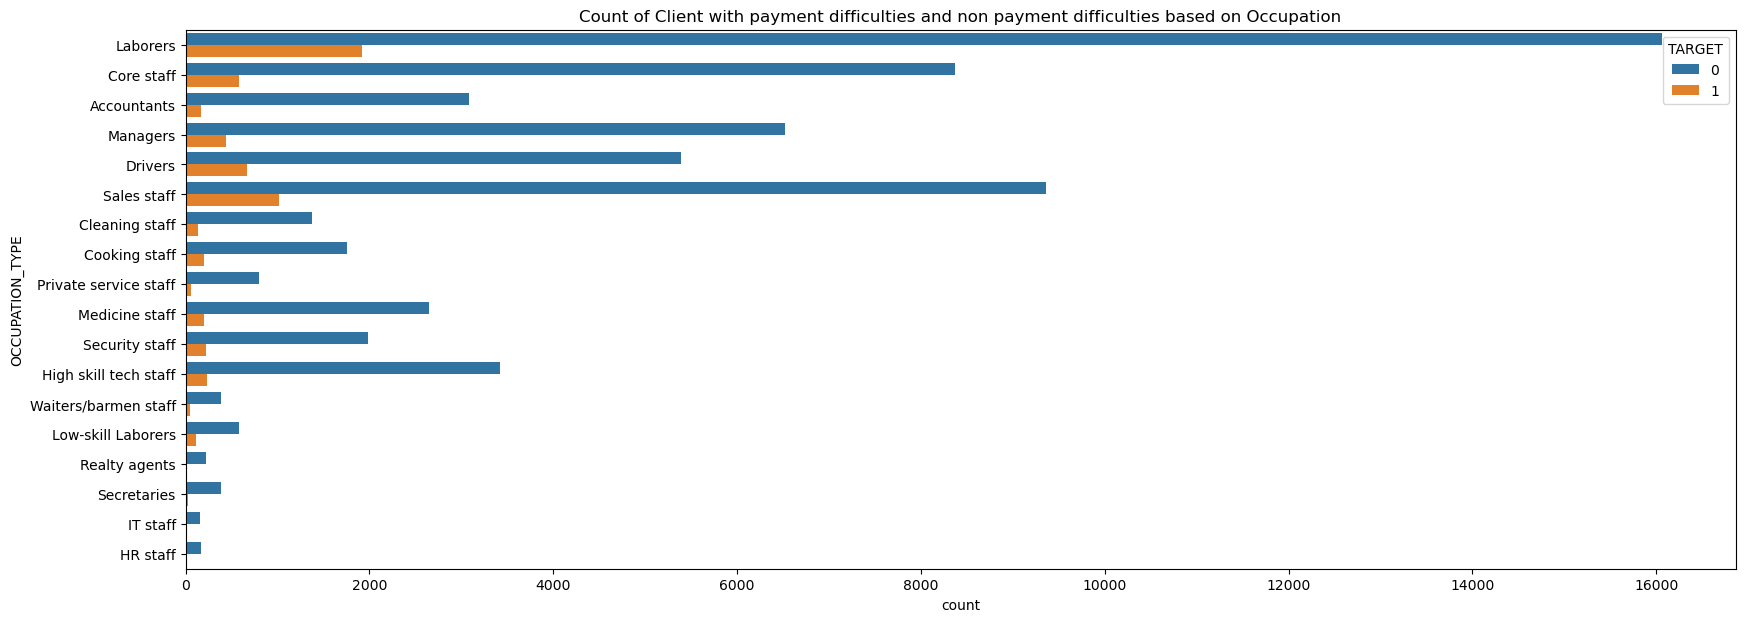

In [55]:
fig, ax = plt.subplots(figsize = (20, 7))
sb.countplot(y = "OCCUPATION_TYPE", hue = "TARGET", data = data)
plt.title('Count of Client with payment difficulties and non payment difficulties based on Occupation')
plt.show()


## Here we can see that The client who does not have any issue in paying loan in past are belong to Laborers,Core Staff,
## Sales staff,managers and driver.

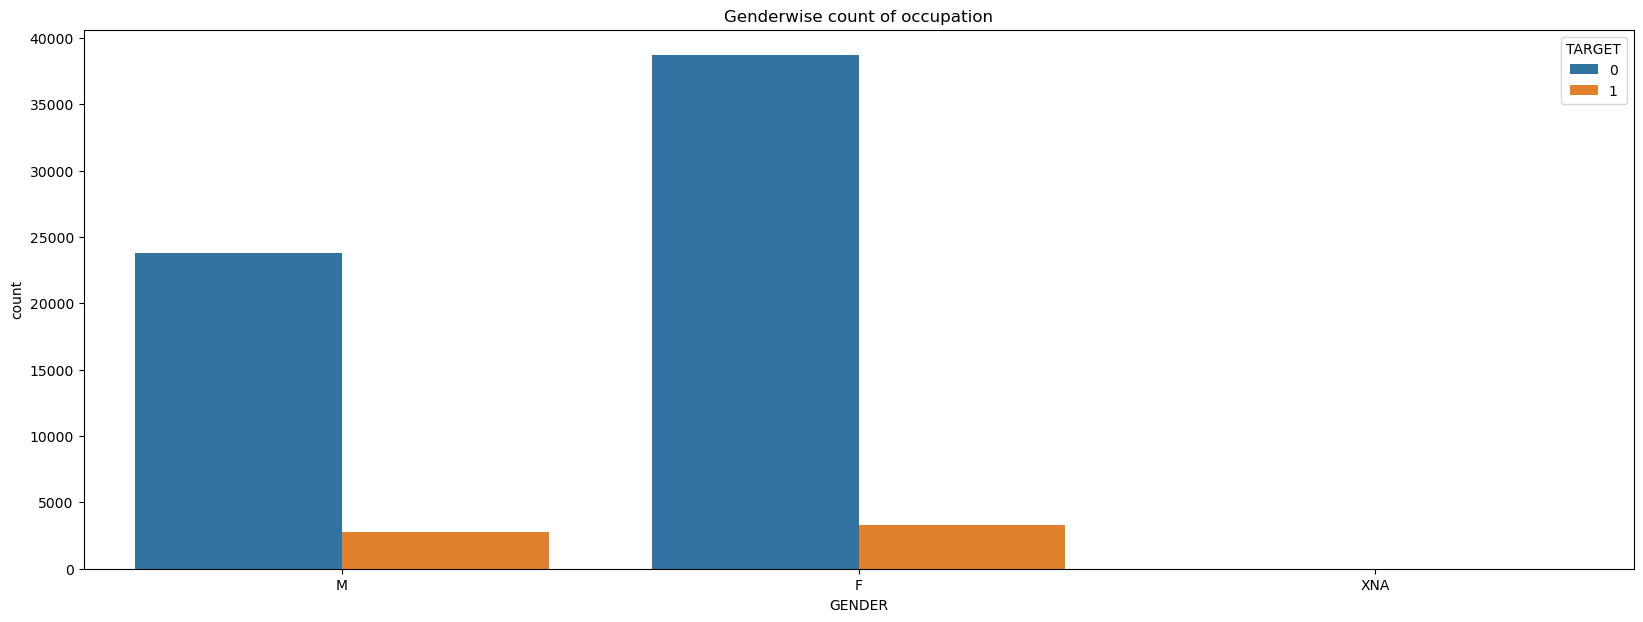

In [107]:
fig, ax = plt.subplots(figsize = (20, 7))
sb.countplot(x = "GENDER", hue = "TARGET", data = data)
plt.title('Genderwise count of occupation')
plt.show()

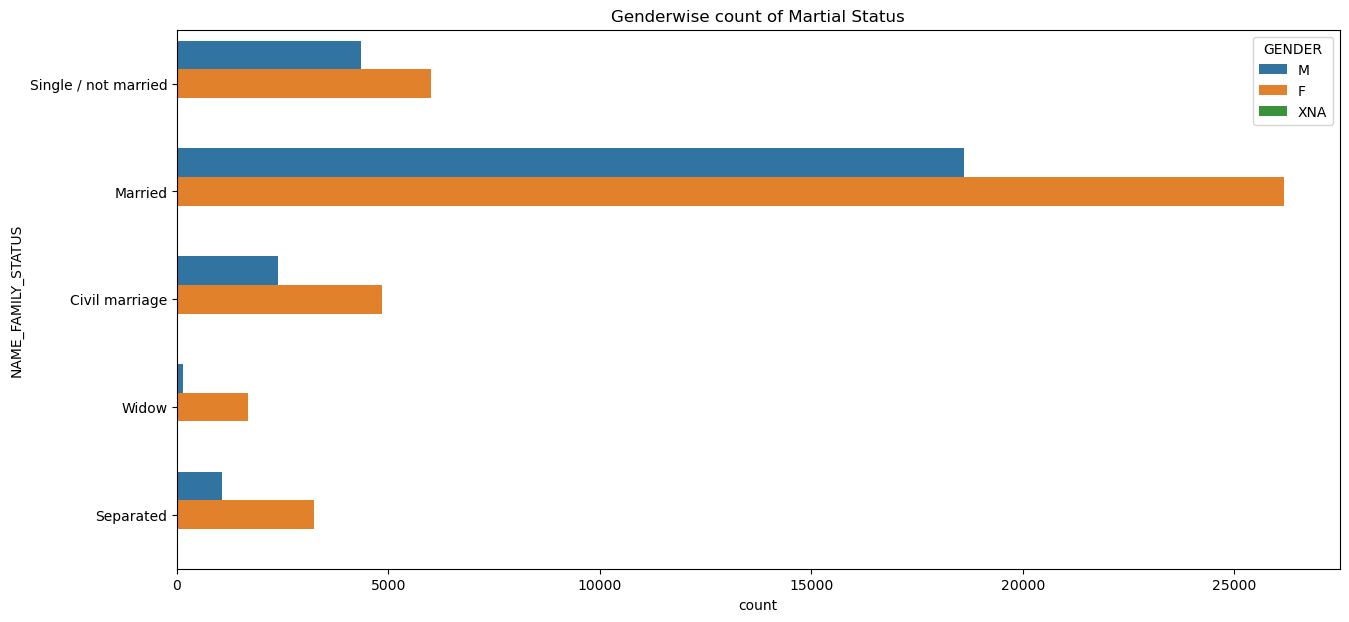

In [104]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(y = "NAME_FAMILY_STATUS", hue = "GENDER", data = data)
plt.title('Genderwise count of Martial Status')
plt.show()

## Here we can see that more number of females and males are married who wants to take loan.

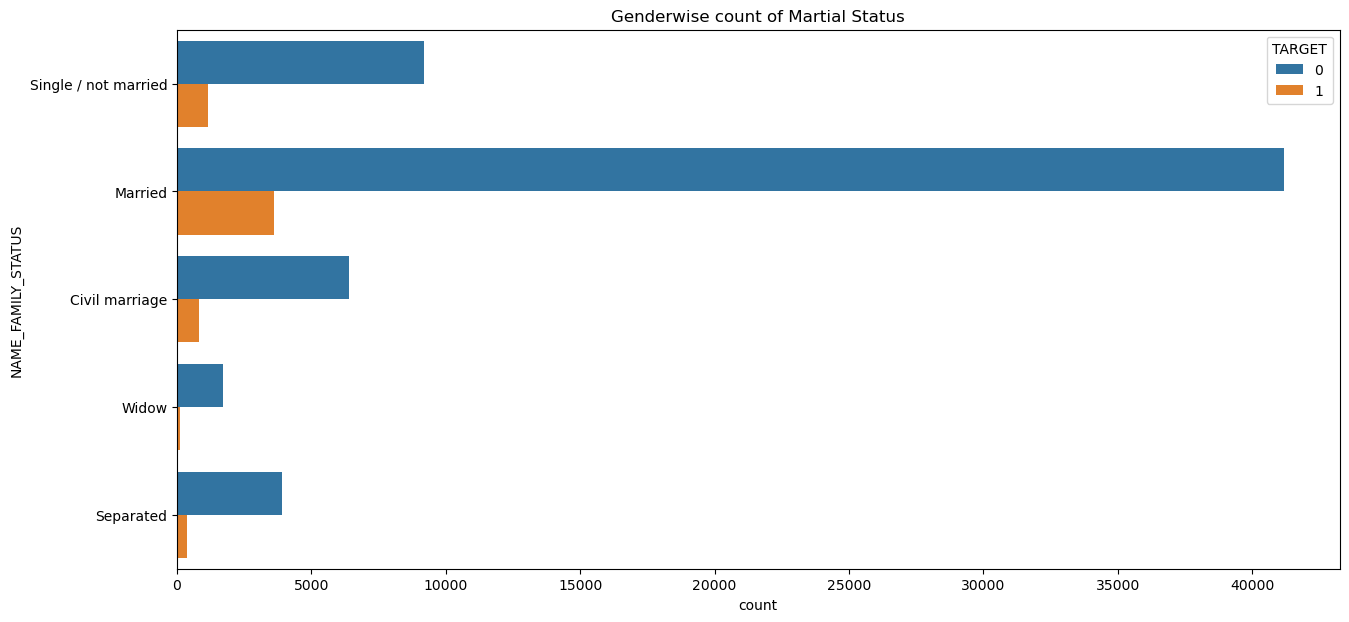

In [82]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(y = "NAME_FAMILY_STATUS", hue = "TARGET", data = data)
plt.title('Genderwise count of Martial Status')
plt.show()

## Here we can see that more number of client with no payment difficulties are married.

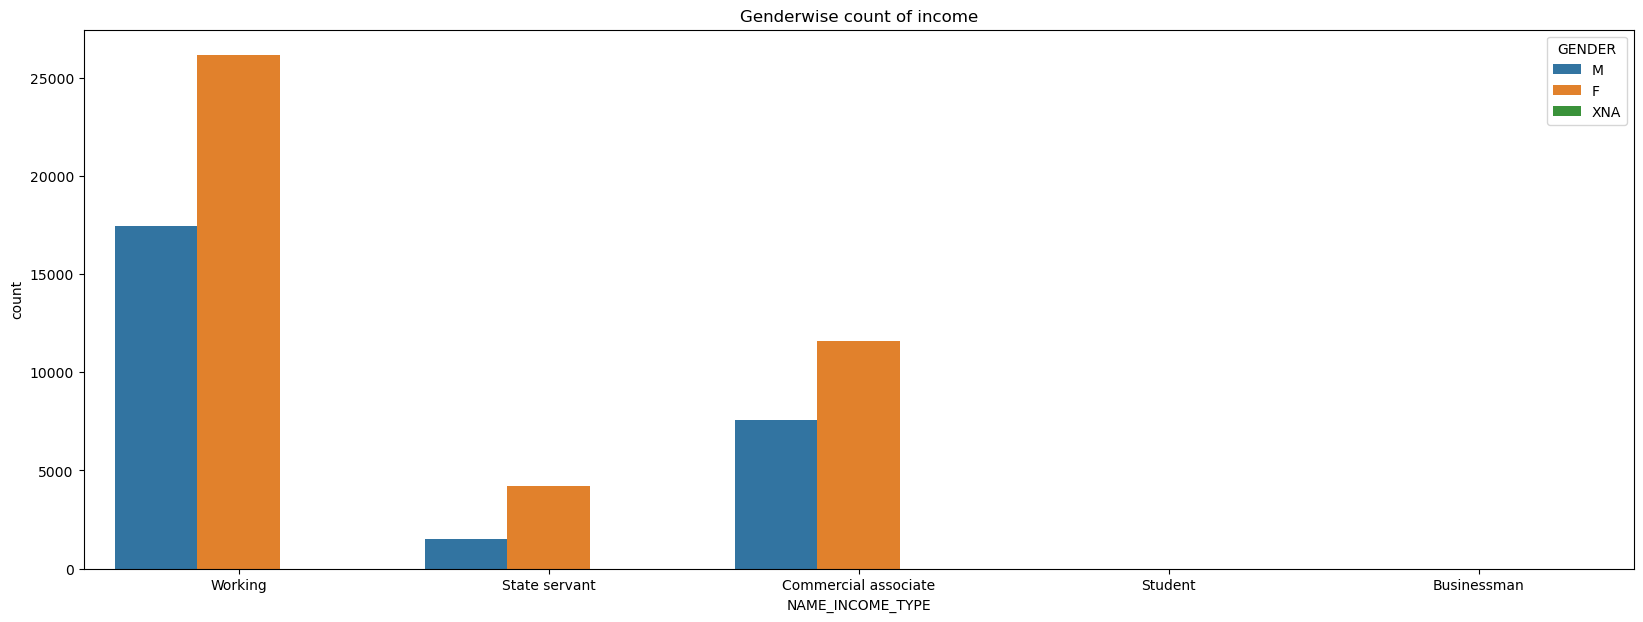

In [83]:
fig, ax = plt.subplots(figsize = (20, 7))
sb.countplot(x = "NAME_INCOME_TYPE", hue = "GENDER", data = data)
plt.title('Genderwise count of income')
plt.show()

## Here we can see that number of female are higher in working who have applied for loan

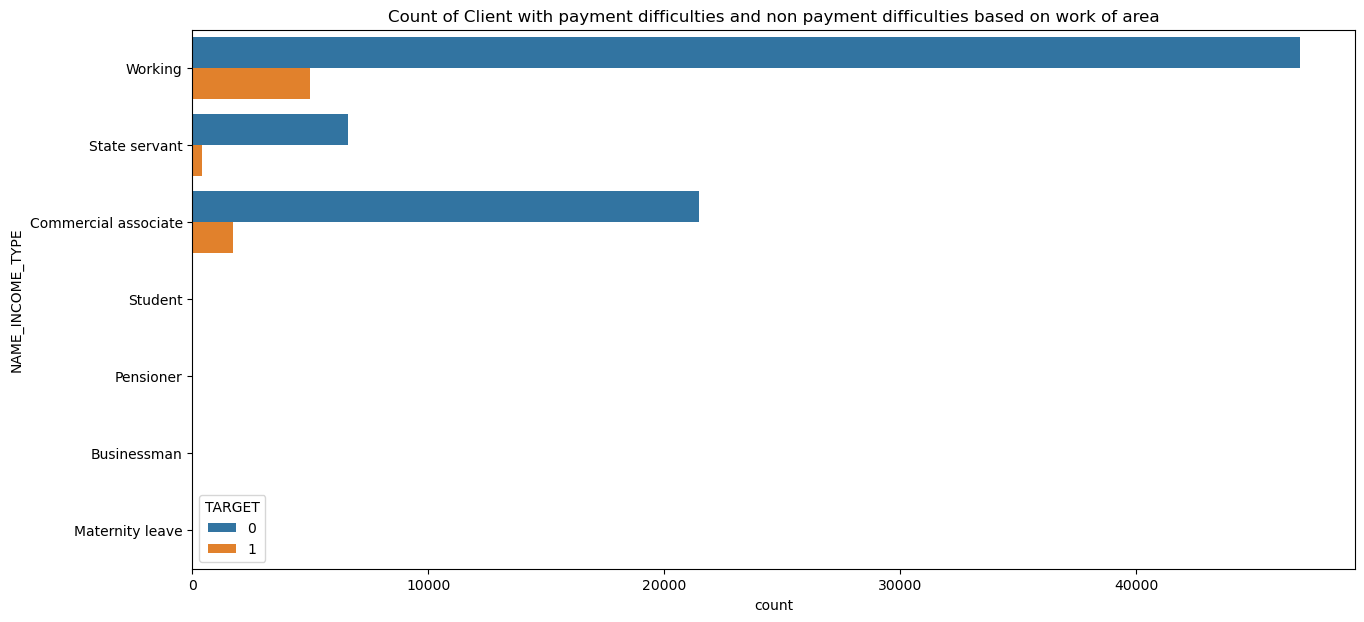

In [17]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(y = "NAME_INCOME_TYPE", hue = "TARGET", data = data)
plt.title('Count of Client with payment difficulties and non payment difficulties based on work of area')
plt.show()


## Here we can see that the clients with no issue in paying loan mostly belong to Working category.

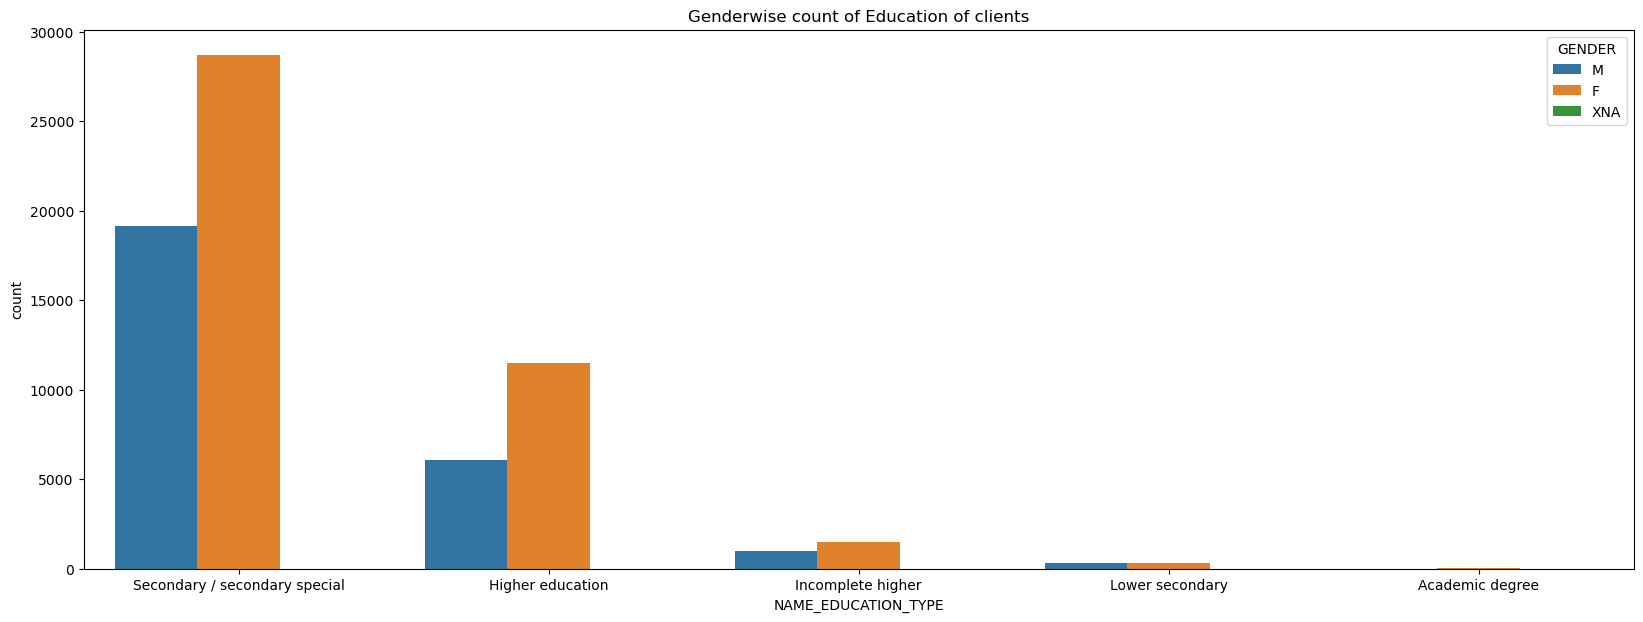

In [84]:
fig, ax = plt.subplots(figsize = (20, 7))
sb.countplot(x = "NAME_EDUCATION_TYPE", hue = "GENDER", data = data)
plt.title('Genderwise count of Education of clients')
plt.show()

## Here we can observe that females are more qualified than male who have applied for loan

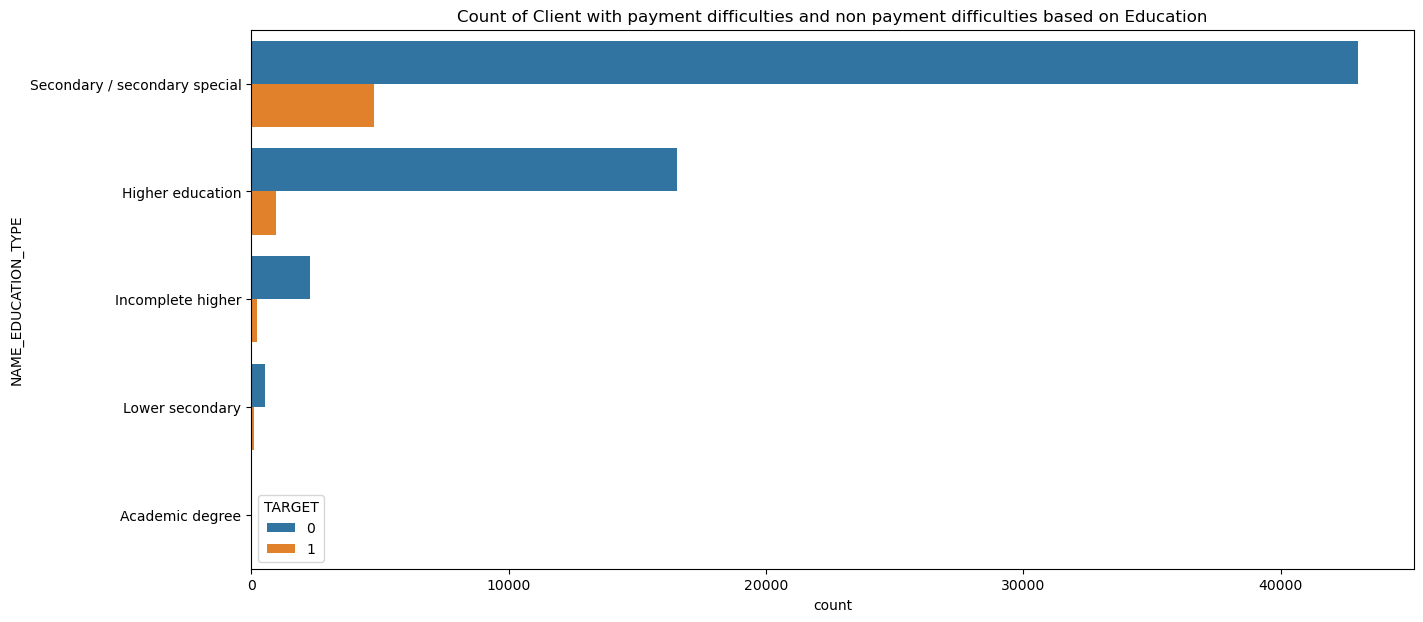

In [85]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(y = "NAME_EDUCATION_TYPE", hue = "TARGET", data = data)
plt.title('Count of Client with payment difficulties and non payment difficulties based on Education')
plt.show()

##  Here we can see that The clients has no payment difficulties mostky belong to Secondary education.

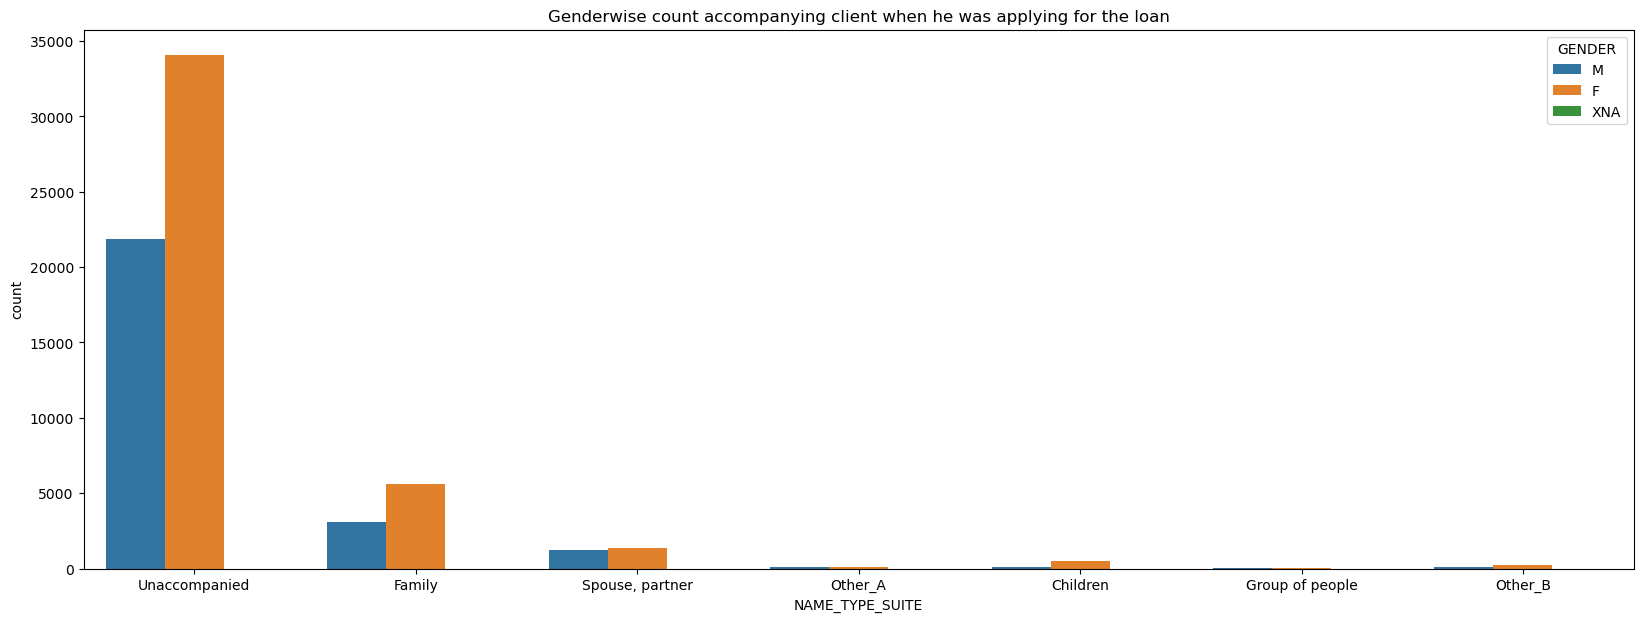

In [86]:
fig, ax = plt.subplots(figsize = (20, 7))
sb.countplot(x = "NAME_TYPE_SUITE", hue = "GENDER", data = data)
plt.title('Genderwise count accompanying client when he was applying for the loan')
plt.show()

## With this graph we can mostly females were not accompany when they applied for loan.

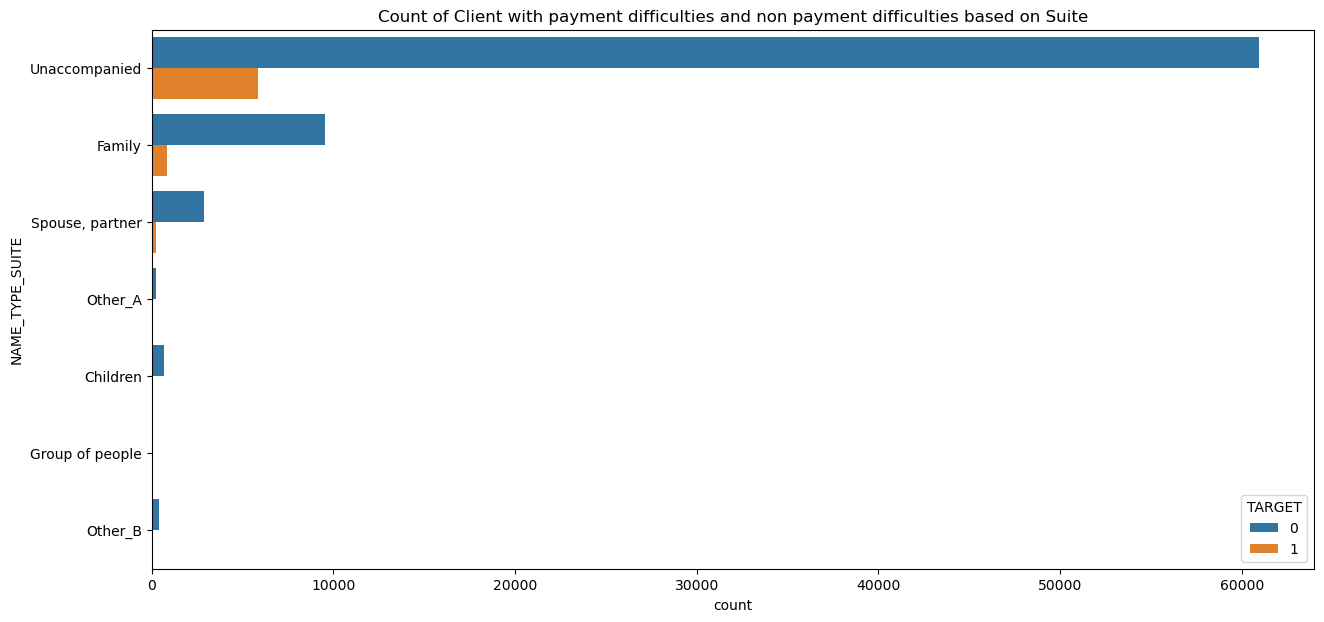

In [18]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(y = "NAME_TYPE_SUITE", hue = "TARGET", data = data)
plt.title('Count of Client with payment difficulties and non payment difficulties based on Suite')
plt.show()

# Here we can see that Clients with no payment difficulties mostly belong to Unaccompanied.

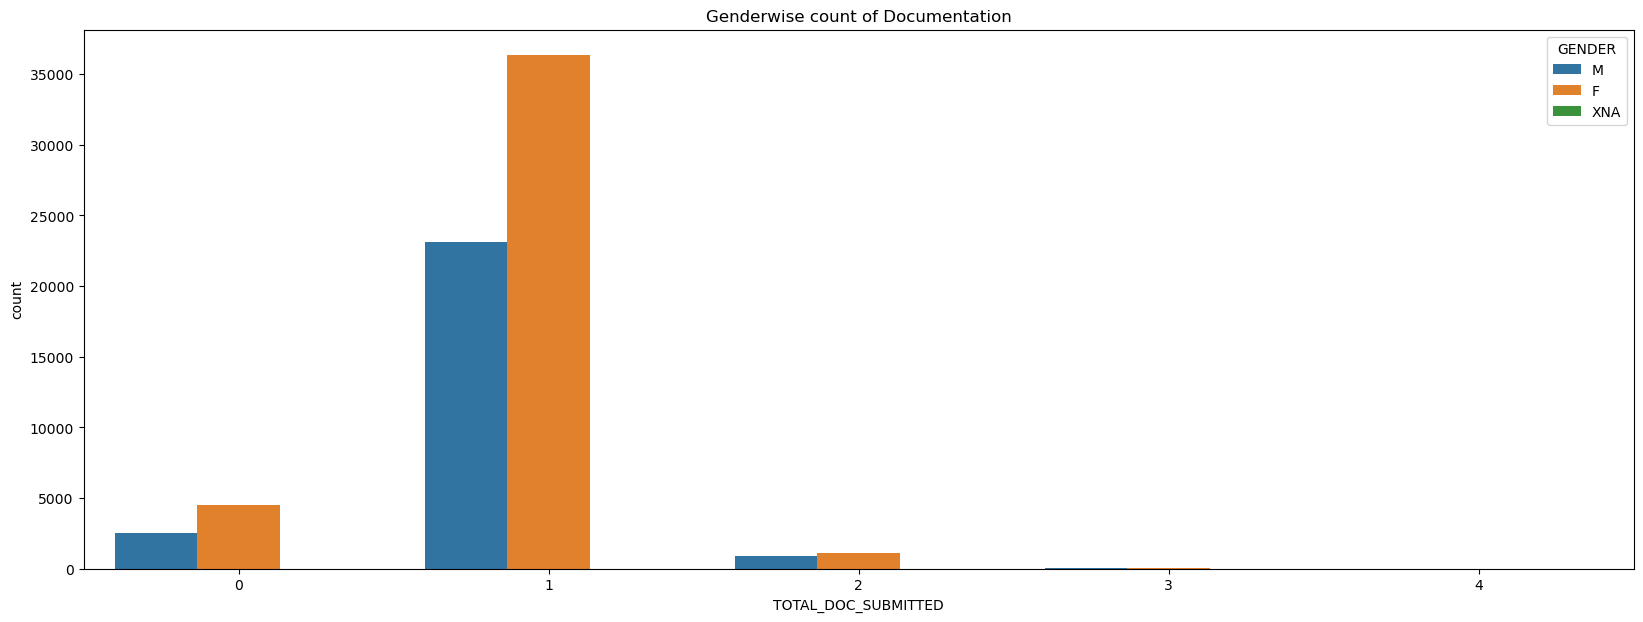

In [87]:
fig, ax = plt.subplots(figsize = (20, 7))
sb.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "GENDER", data = data)
plt.title('Genderwise count of Documentation')
plt.show()

##  Here we can see that mostly clients submitted 1 documents who have applied for loan

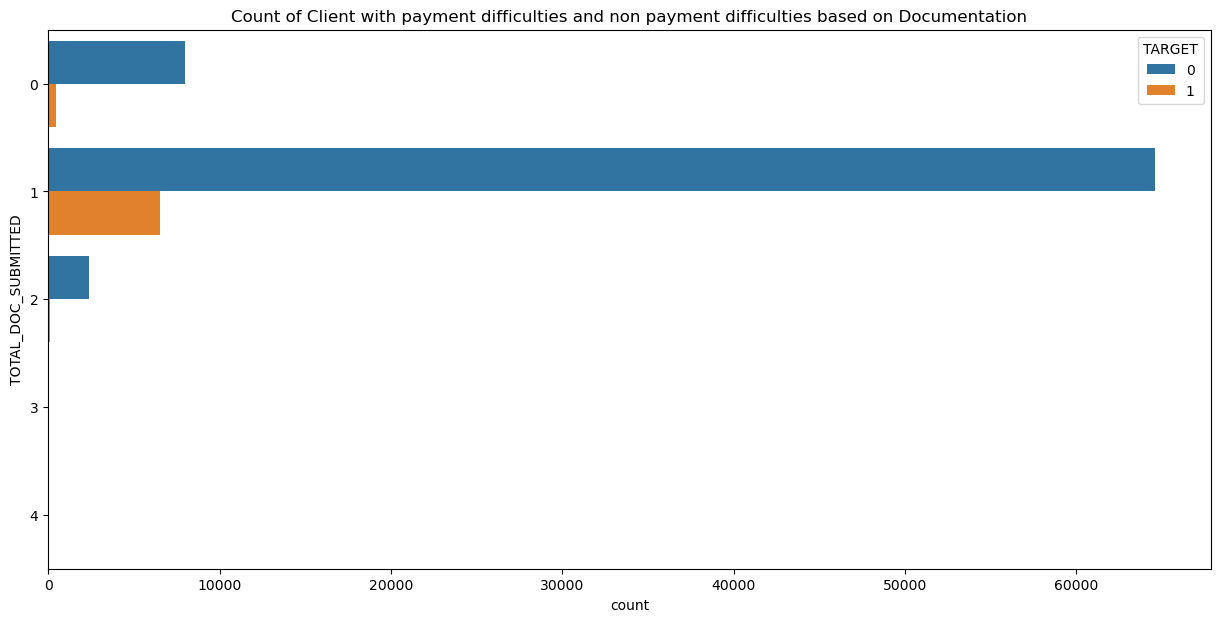

In [19]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(y = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data = data)
plt.title('Count of Client with payment difficulties and non payment difficulties based on Documentation')
plt.show()

## here we can see that clients (with no payment difficulties) mostly submitted 1 document. 

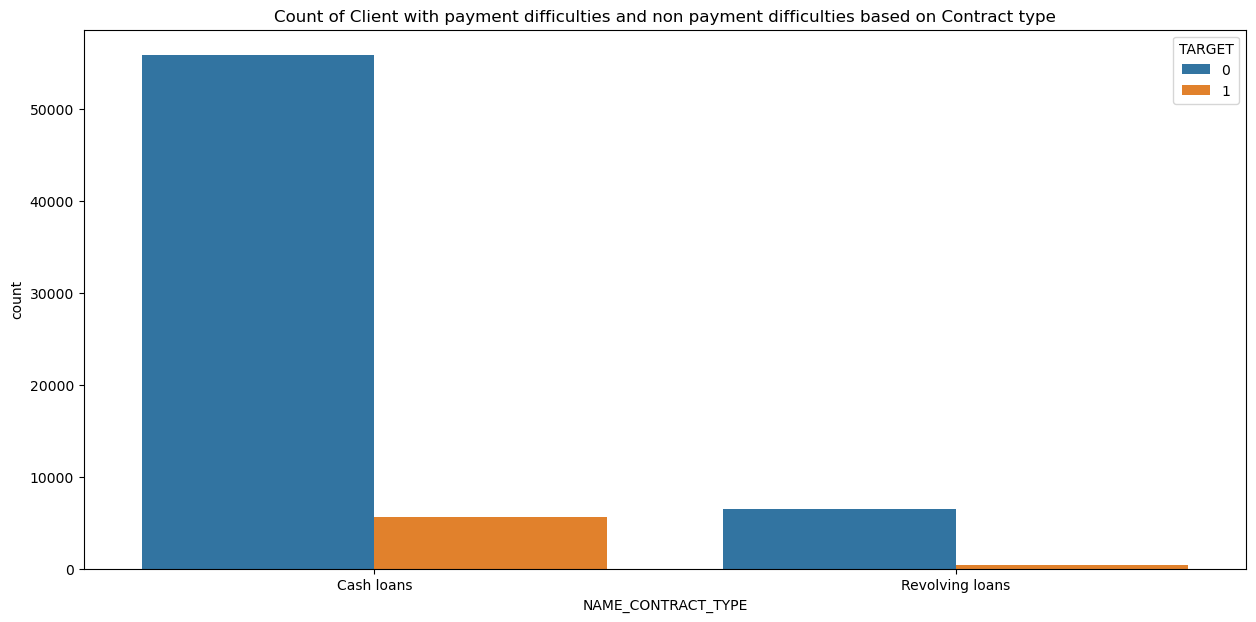

In [88]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = data)
plt.title('Count of Client with payment difficulties and non payment difficulties based on Contract type')
plt.show()

## Here we can see client with no payment difficulties mostly got the cash loans.

<function matplotlib.pyplot.show(close=None, block=None)>

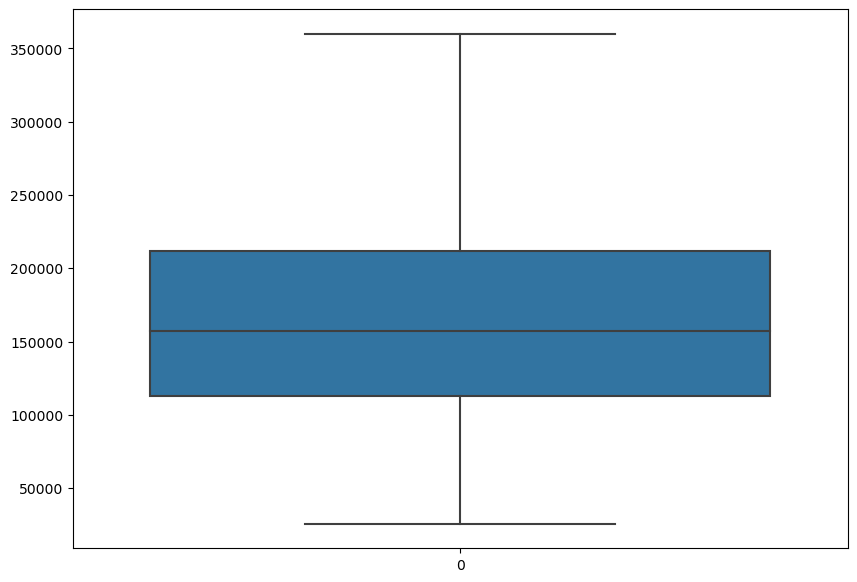

In [46]:
plt.figure(figsize = (10,7))
sb.boxplot(data.AMT_INCOME_TOTAL)
plt.show

## Here we can see there are outliers in Income so we need to treat that.

In [51]:
q1=data["AMT_INCOME_TOTAL"].describe()["25%"]
q3=data["AMT_INCOME_TOTAL"].describe()["75%"]
iqr=q3-q1 #interquartile range
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
data["AMT_INCOME_TOTAL"]=np.where(data["AMT_INCOME_TOTAL"]>upper_fence,upper_fence,data["AMT_INCOME_TOTAL"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

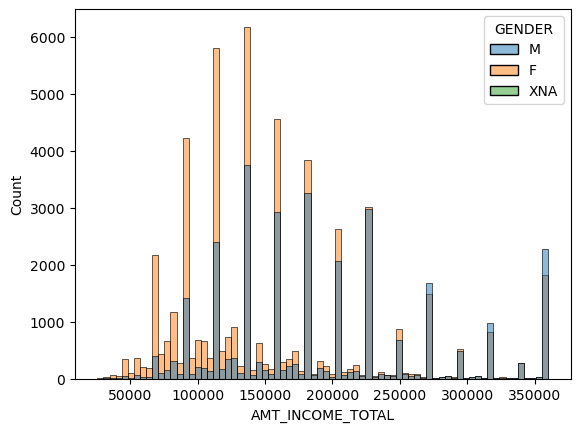

In [49]:
fig, ax = plt.subplots()
sb.histplot(data=d1, x="AMT_INCOME_TOTAL",hue='GENDER')

## Here we can see that more number of females income in total is 100000 to 200000.

In [58]:
q1=data["AMT_CREDIT"].describe()["25%"]
q3=data["AMT_CREDIT"].describe()["75%"]
iqr=q3-q1 #interquartile range
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
data["AMT_CREDIT"]=np.where(data["AMT_CREDIT"]>upper_fence,upper_fence,data["AMT_CREDIT"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

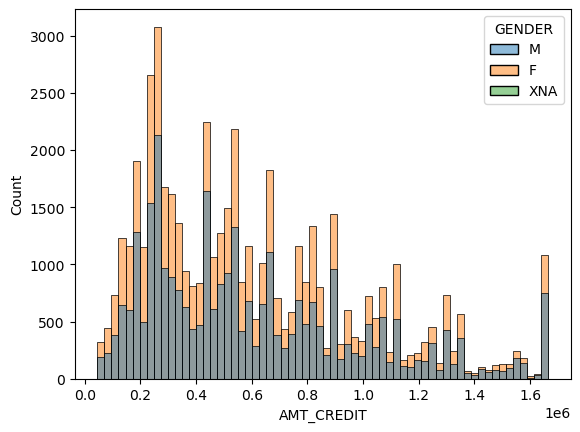

In [89]:
sb.histplot(data=d1, x="AMT_CREDIT",hue='GENDER')


## here we can see more number of females are there who are getting credited amount around 200000 to 500000

In [60]:
q1=data["AMT_GOODS_PRICE"].describe()["25%"]
q3=data["AMT_GOODS_PRICE"].describe()["75%"]
iqr=q3-q1 #interquartile range
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
data["AMT_GOODS_PRICE"]=np.where(data["AMT_GOODS_PRICE"]>upper_fence,upper_fence,data["AMT_GOODS_PRICE"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Count'>

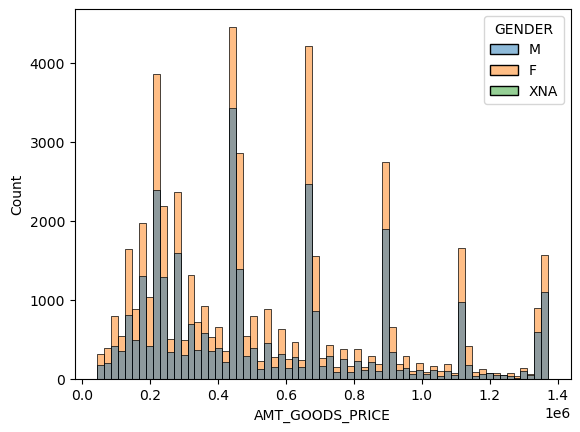

In [91]:
sb.histplot(data=d1, x="AMT_GOODS_PRICE",hue='GENDER')

## Here we can see that the mostly Goods price loan lies between 500000 to 700000 for both gender.

In [62]:
q1=data["DAYS_EMPLOYED"].describe()["25%"]
q3=data["DAYS_EMPLOYED"].describe()["75%"]
iqr=q3-q1 #interquartile range
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
data["DAYS_EMPLOYED"]=np.where(data["DAYS_EMPLOYED"]>upper_fence,upper_fence,data["DAYS_EMPLOYED"])
# df1["AMT_INCOME_TOTAL"]=np.where(application_data["AMT_INCOME_TOTAL"]<lower_bound,lower_bound,df1["AMT_INCOME_TOTAL"])

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

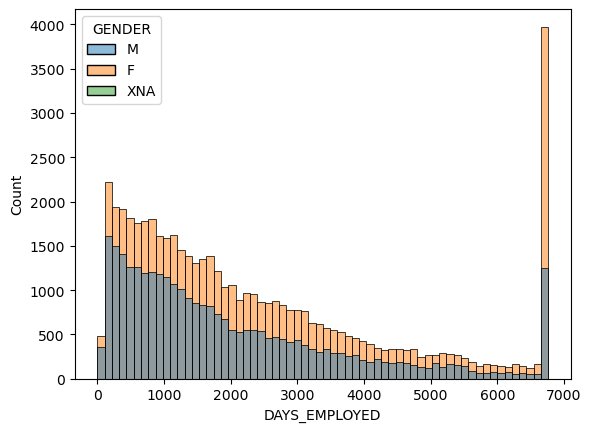

In [92]:
sb.histplot(data=d1, x="DAYS_EMPLOYED",hue='GENDER')

##  The mostly experience we can say lies in 6900 approx for both gender.

In [100]:
target0=num_data[(num_data.TARGET == 0)]
target1=num_data[(num_data.TARGET == 1)]

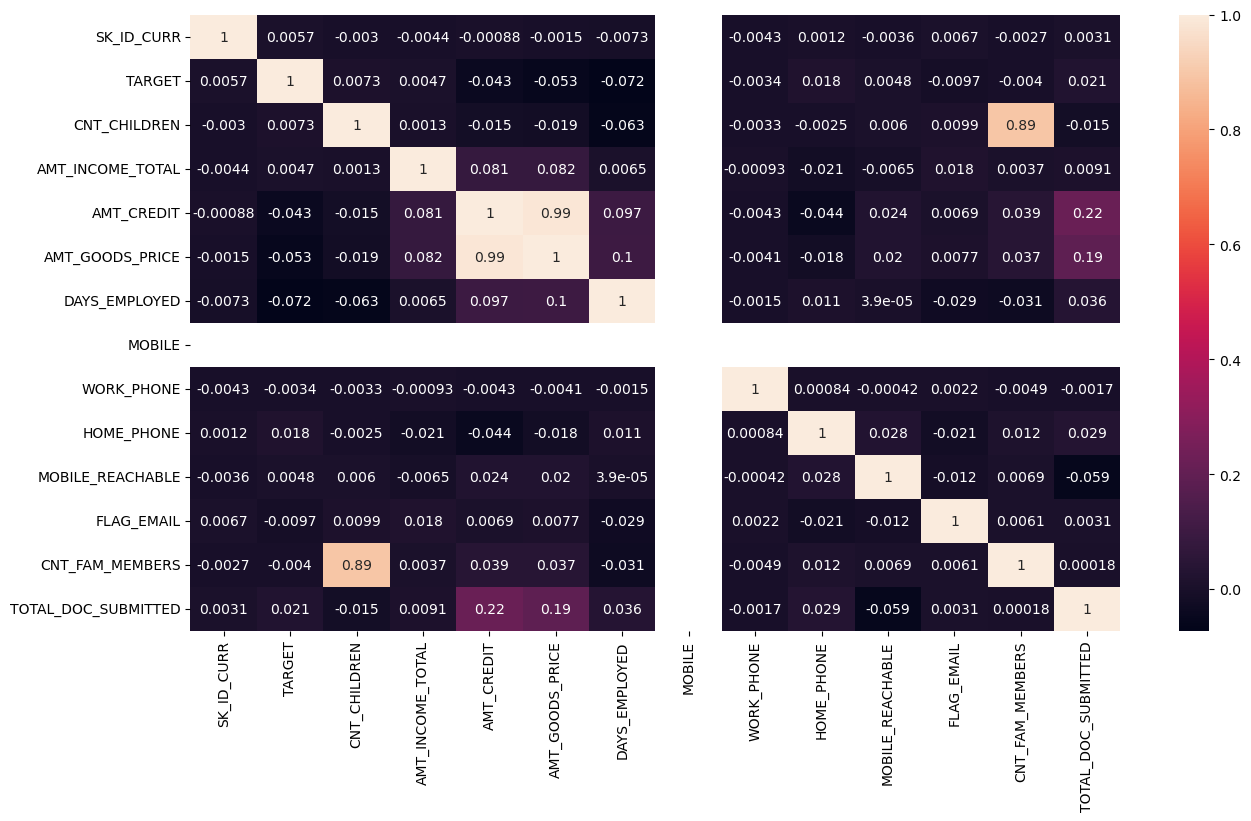

In [9]:
plt.figure(figsize = (15,8))
sb.heatmap(data.corr(), annot = True)
plt.show()

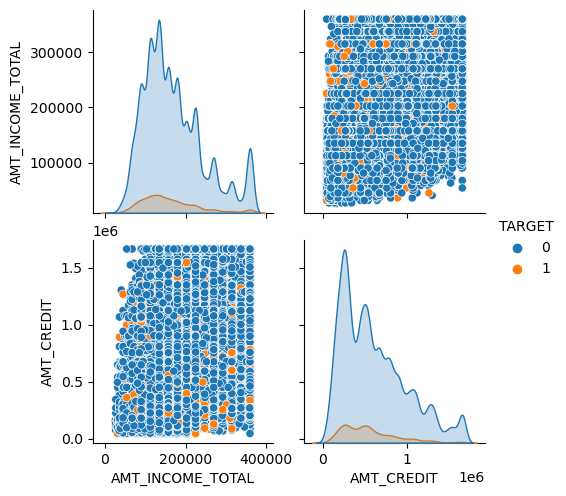

In [110]:
sb.pairplot(data,hue='TARGET',vars=['AMT_INCOME_TOTAL','AMT_CREDIT'])

In [108]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

# Final Conclusion

